In [1]:
# Import necessary libraries
import pandas as pd                                   # For data manipulation and analysis
import numpy as np                                    # For numerical operations
import matplotlib.pyplot as plt                       # For data visualization
import seaborn as sns                                 # For enhanced visualizations
from sklearn.cluster import KMeans                    # For K-Means clustering
from sklearn.preprocessing import StandardScaler      # For data normalization
from sklearn.metrics import silhouette_score          # For evaluating clustering performance
from sklearn.datasets import load_iris                # For accessing sklearn dataset (Iris)

In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load and Explore Iris Dataset
print("📊 Loading Iris Dataset...")
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Adding target for comparison

📊 Loading Iris Dataset...


In [4]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 

In [5]:
# Data Preparation
print("\n🧹 Data Preparation...")
# For clustering, we'll use only the features (exclude species column)
X = df.drop('species', axis=1)


🧹 Data Preparation...


In [6]:
# Check for missing values
print("Missing values in each column:")
print(X.isnull().sum())

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [7]:
# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

print("\nData after standardization:")
print(pd.DataFrame(X_scaled_df).describe())


Data after standardization:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  


In [8]:
# Exploratory Data Analysis
print("\n📈 Exploratory Data Analysis...")


📈 Exploratory Data Analysis...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 1200x800 with 0 Axes>

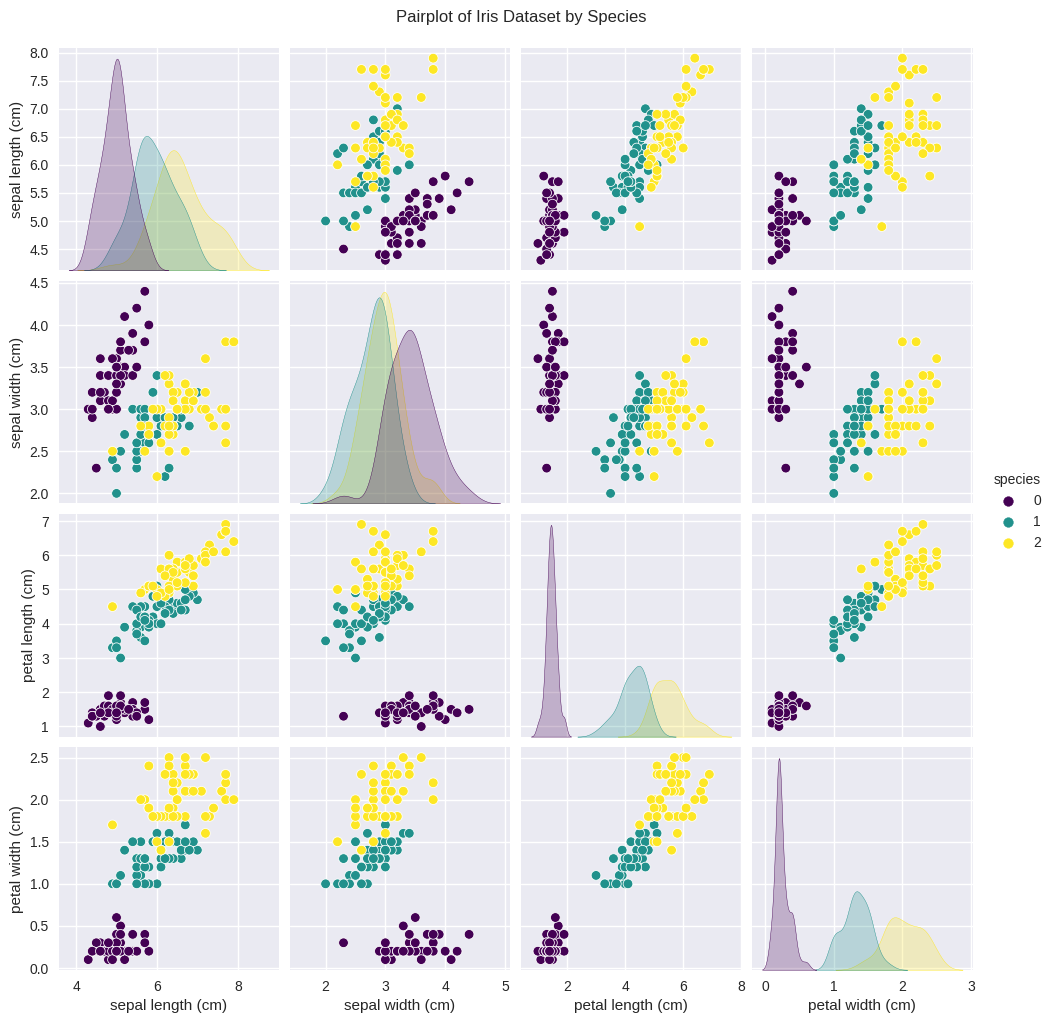

In [9]:
# Pairplot to see relationships
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset by Species', y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


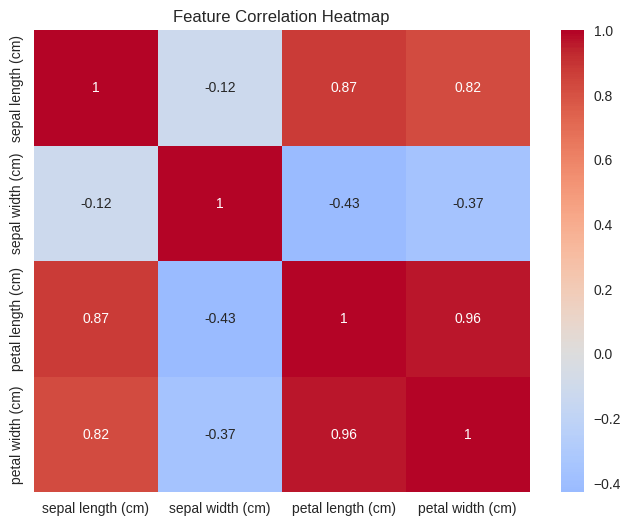

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
# Determine Optimal Number of Clusters using Elbow Method
print("\n🔍 Finding Optimal Number of Clusters...")

wcss_values = []
silhouette_scores = []
cluster_range = range(2, 8)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if i > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)


🔍 Finding Optimal Number of Clusters...


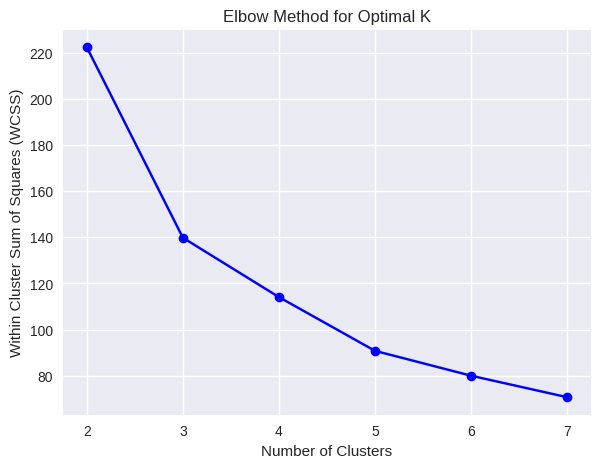

In [12]:
# Plot Elbow Method
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss_values, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)

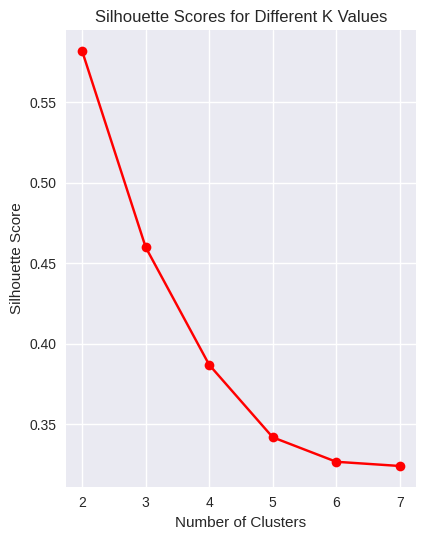

In [13]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# Implement K-Means Clustering with Optimal K
print("\n🎯 Implementing K-Means Clustering...")

# Based on elbow method and silhouette score, let's choose 3 clusters
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels


🎯 Implementing K-Means Clustering...


In [15]:
# Evaluate the Clustering
print("\n📊 Evaluating Clustering Performance...")


📊 Evaluating Clustering Performance...


In [16]:
# Calculate metrics
wcss = kmeans.inertia_
total_variance = np.sum(np.var(X_scaled, axis=0))
bcss = total_variance - wcss
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"Within Cluster Sum of Squares (WCSS): {wcss:.2f}")
print(f"Between Cluster Sum of Squares (BCSS): {bcss:.2f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

Within Cluster Sum of Squares (WCSS): 139.82
Between Cluster Sum of Squares (BCSS): -135.82
Silhouette Score: 0.460


In [17]:
# Visualize Clustering Results
print("\n🎨 Visualizing Clustering Results...")


🎨 Visualizing Clustering Results...


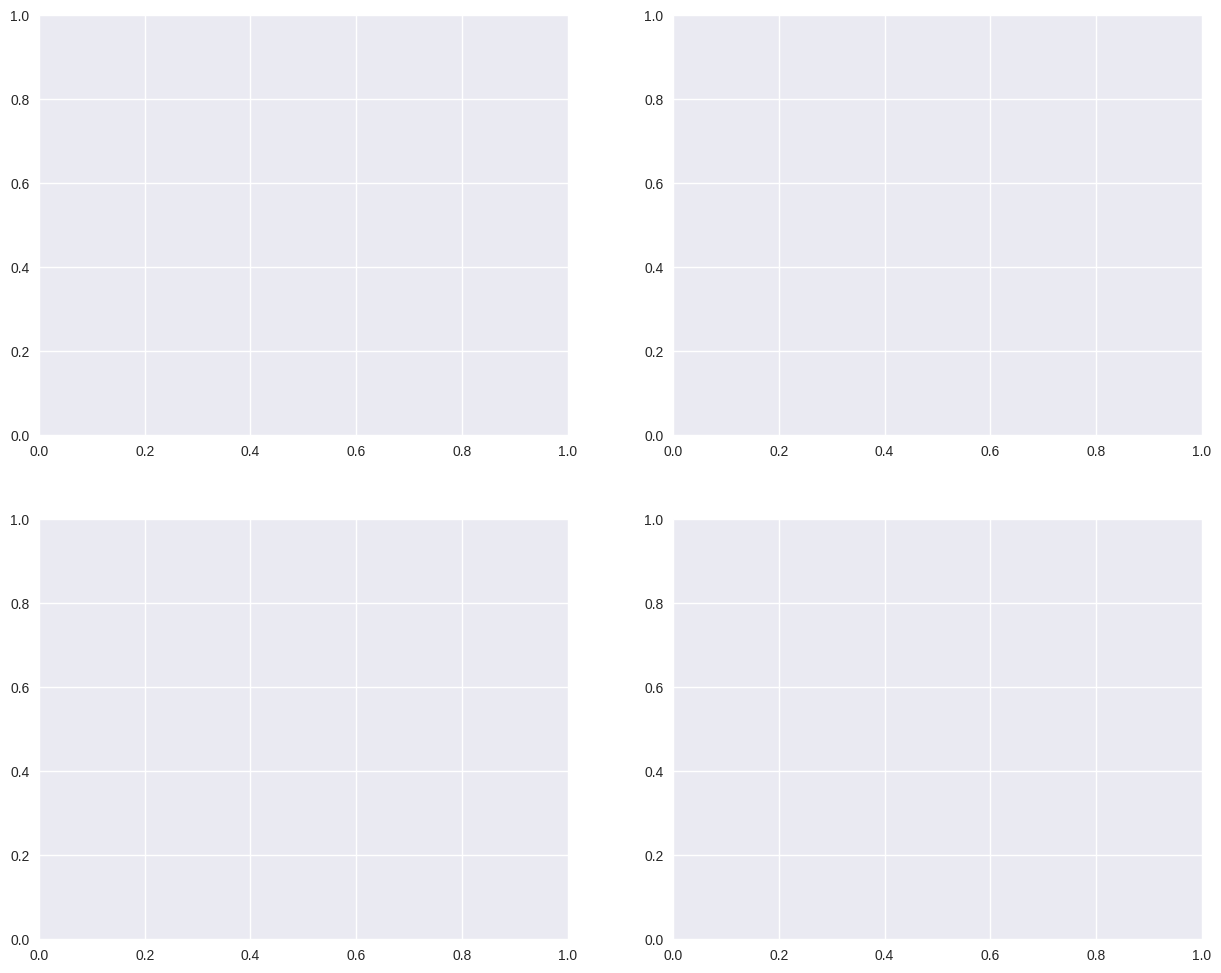

In [18]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

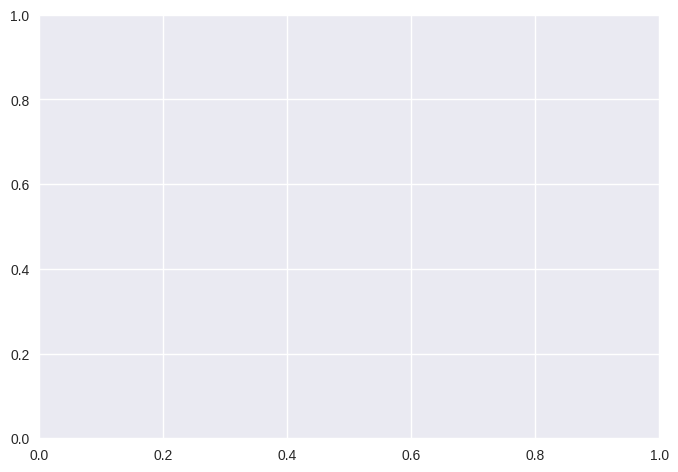

In [19]:
# Plot 1: Sepal length vs Sepal width
scatter1 = axes[0,0].scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], 
                            c=cluster_labels, cmap='viridis', s=50)
axes[0,0].set_xlabel('Sepal Length (standardized)')
axes[0,0].set_ylabel('Sepal Width (standardized)')
axes[0,0].set_title('Clusters: Sepal Length vs Width')
plt.colorbar(scatter1, ax=axes[0,0])

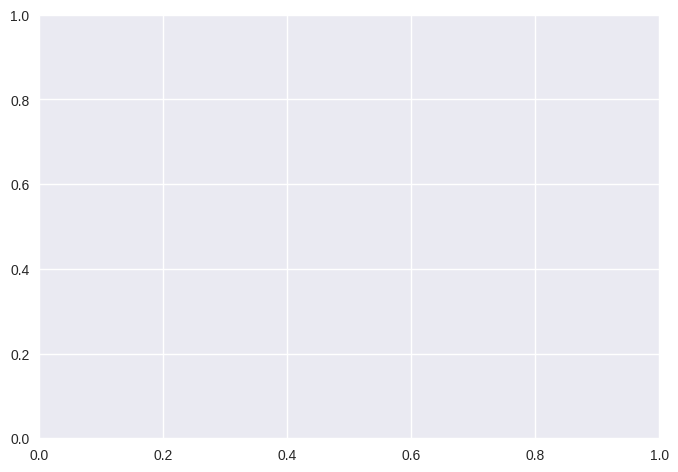

In [20]:
# Plot 2: Petal length vs Petal width
scatter2 = axes[0,1].scatter(X_scaled_df.iloc[:, 2], X_scaled_df.iloc[:, 3], 
                            c=cluster_labels, cmap='viridis', s=50)
axes[0,1].set_xlabel('Petal Length (standardized)')
axes[0,1].set_ylabel('Petal Width (standardized)')
axes[0,1].set_title('Clusters: Petal Length vs Width')
plt.colorbar(scatter2, ax=axes[0,1])

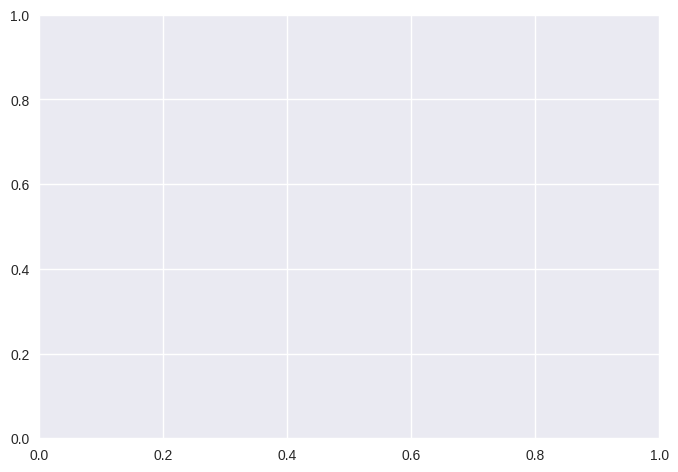

In [21]:
# Plot 3: Compare with actual species
scatter3 = axes[1,0].scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], 
                            c=df['species'], cmap='Set2', s=50)
axes[1,0].set_xlabel('Sepal Length (standardized)')
axes[1,0].set_ylabel('Sepal Width (standardized)')
axes[1,0].set_title('Actual Species: Sepal Length vs Width')
plt.colorbar(scatter3, ax=axes[1,0])

In [22]:
# Plot 4: Cluster sizes
cluster_counts = df['cluster'].value_counts().sort_index()
axes[1,1].bar(cluster_counts.index, cluster_counts.values, color=['red', 'green', 'blue'])
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Points')
axes[1,1].set_title('Cluster Sizes')
for i, v in enumerate(cluster_counts.values):
    axes[1,1].text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [23]:
# Analyze Cluster Characteristics
print("\n🔬 Cluster Analysis...")


🔬 Cluster Analysis...


In [24]:
# Add cluster labels to original dataframe
cluster_analysis = df.groupby('cluster').mean()
print("\nCluster Centroids (Original Scale):")
print(cluster_analysis.drop('species', axis=1))


Cluster Centroids (Original Scale):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 6.780851          3.095745           5.510638   
1                 5.006000          3.428000           1.462000   
2                 5.801887          2.673585           4.369811   

         petal width (cm)  
cluster                    
0                1.972340  
1                0.246000  
2                1.413208  


In [25]:
# Compare with actual species distribution
print("\nCross-tabulation: Clusters vs Actual Species")
cross_tab = pd.crosstab(df['cluster'], df['species'])
print(cross_tab)


Cross-tabulation: Clusters vs Actual Species
species   0   1   2
cluster            
0         0  11  36
1        50   0   0
2         0  39  14


In [26]:
# 3D Visualization (Bonus)
print("\n✨ 3D Visualization (Bonus)...")


✨ 3D Visualization (Bonus)...


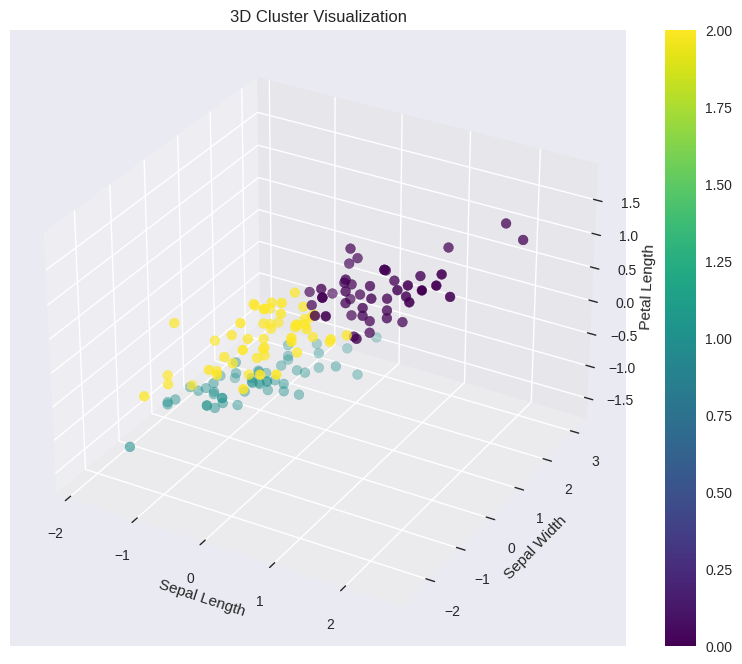


✅ K-Means Clustering Completed Successfully!
🎯 Optimal number of clusters: 3
📊 Silhouette Score: 0.460
🔍 Clusters created: 3


In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], X_scaled_df.iloc[:, 2], 
                    c=cluster_labels, cmap='viridis', s=50)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Cluster Visualization')

plt.colorbar(scatter)
plt.show()

print("\n✅ K-Means Clustering Completed Successfully!")
print(f"🎯 Optimal number of clusters: {optimal_k}")
print(f"📊 Silhouette Score: {silhouette_avg:.3f}")
print(f"🔍 Clusters created: {optimal_k}")

In [28]:
# Display final dataframe with clusters
print("\n📋 Final Data with Cluster Assignments:")
print(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'cluster']].head(10))


📋 Final Data with Cluster Assignments:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  cluster  
0        0        1  
1        0        1  
2        0        1  
3 